Data Acquisition and Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("walmart.csv")

In [4]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [5]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                

In [6]:
print(df['Age'].unique())
print(df['Age'].value_counts().sort_index())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: count, dtype: int64


In [7]:
df['Purchase'] = df['Purchase'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category            550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 42.0+ MB


In [8]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

Exploratory Data Analysis (EDA)

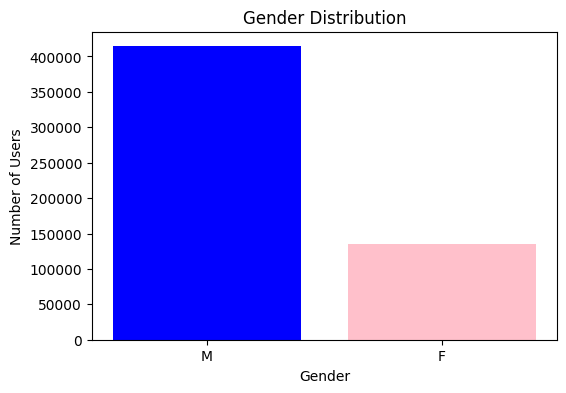

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index,gender_counts.values, color = ['blue','pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

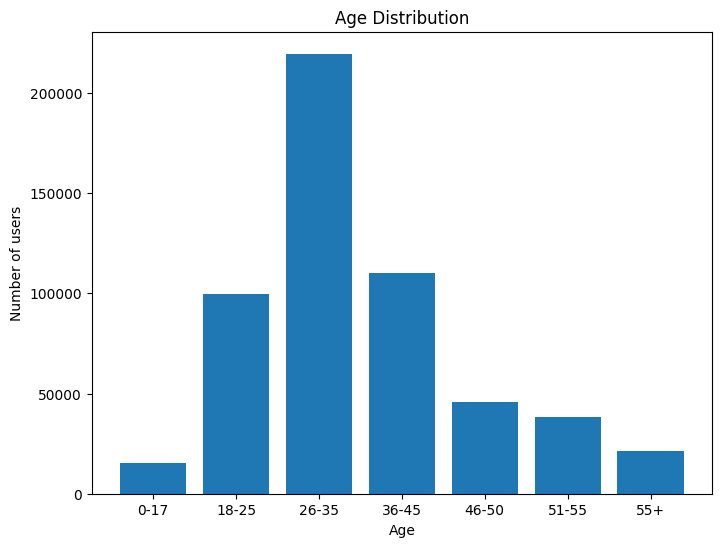

In [ ]:
age_counts = df['Age'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(age_counts.index,age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

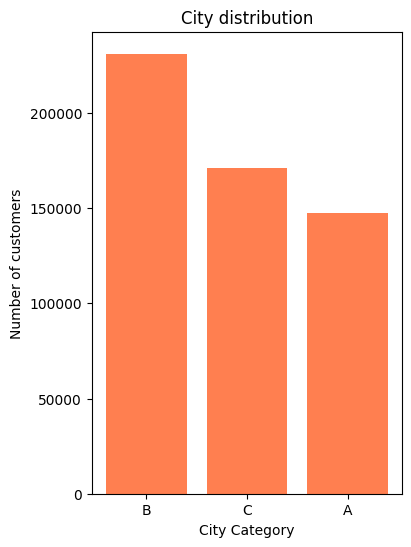

In [14]:
city_counts = df['City_Category'].value_counts()
plt.figure(figsize=(4,6))
plt.bar(city_counts.index,city_counts.values,color ='coral')
plt.title('City distribution')
plt.xlabel('City Category')
plt.ylabel('Number of customers')
plt.show()

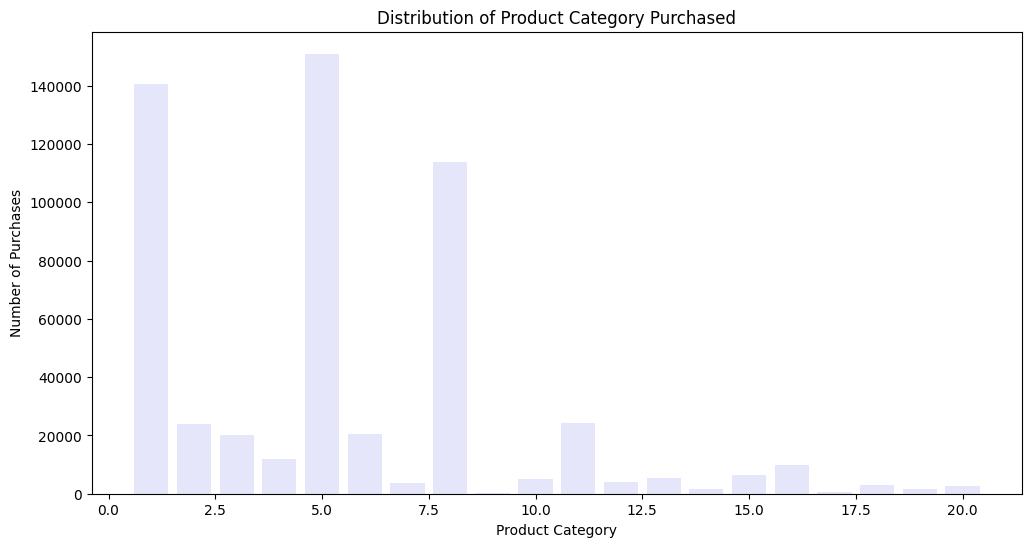

In [17]:
product_counts = df['Product_Category'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(product_counts.index,product_counts.values,color ='lavender')
plt.title('Distribution of Product Category Purchased')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()

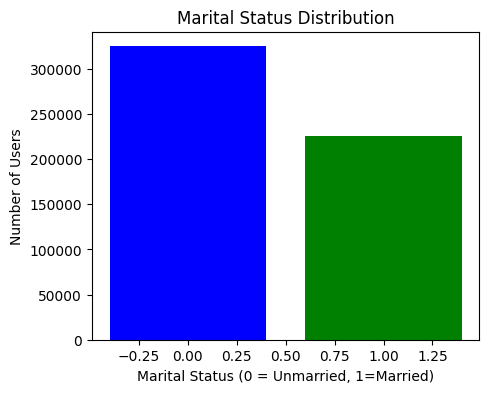

In [19]:
marital_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(5,4))
plt.bar(marital_counts.index,marital_counts.values,color =['blue','green'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status (0 = Unmarried, 1=Married)')
plt.ylabel('Number of Users')
plt.show()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


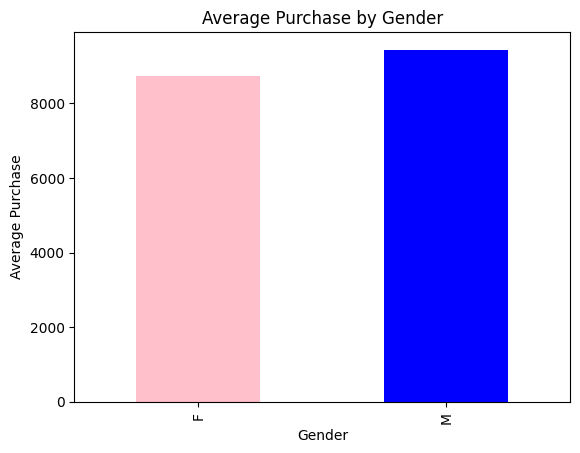

In [21]:
gender_purchase = df.groupby('Gender')['Purchase'].mean()
print(gender_purchase)
gender_purchase.plot(kind='bar',color = ['pink','blue'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.title("Average Purchase by Gender")
plt.show()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


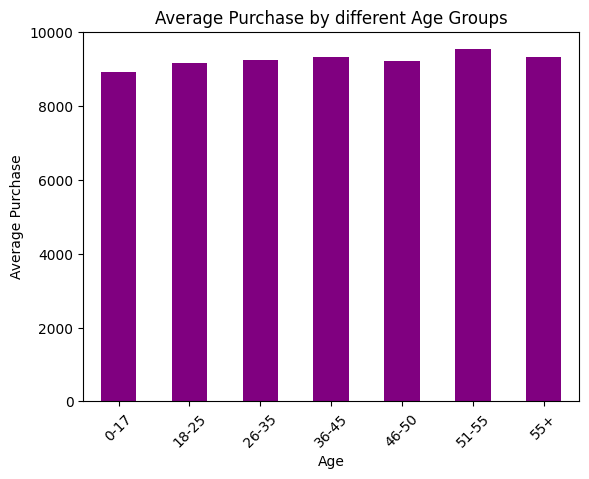

In [24]:
age_purchase = df.groupby('Age')['Purchase'].mean()
print(age_purchase)
age_purchase.plot(kind='bar',color = 'purple')
plt.xlabel('Age')
plt.ylabel('Average Purchase')
plt.title("Average Purchase by different Age Groups")
plt.xticks(rotation = 45)
plt.show()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


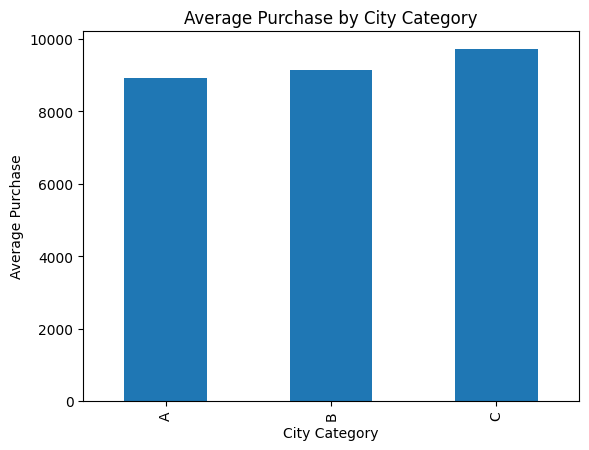

In [25]:
city_purchase = df.groupby('City_Category')['Purchase'].mean()
print(city_purchase)
city_purchase.plot(kind='bar')
plt.xlabel("City Category")
plt.ylabel("Average Purchase")
plt.title("Average Purchase by City Category")
plt.show()